In [1]:
import cooperpairbox as cpb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
var0 = np.array([12.6278295534038, 
                  13.330641556253711, 
                  14.015230903930382,
                  14.505637783062728,
                  16.734044319014014,
                  18,
                  12])
var1 = var0*(1-0.05)
var2 = var0*(1+0.05)
var3 = var0*(1+0.1)
var4 = var0*(1+0.2)

f_eta = np.array([-227.19, 
                  -226.721439, 
                  -225.988659, 
                  -225.198626, 
                  -224.679438])*1e6



In [3]:
cpb_q1 = cpb.Hcpb(nlevels=25)
_ = cpb_q1.params_from_spectrum(4.3, -0.226)

cpb_q2 = cpb.Hcpb(nlevels=25)
_ = cpb_q2.params_from_spectrum(4.4262, -0.226)

cpb_q3 = cpb.Hcpb(nlevels=25)
_ = cpb_q3.params_from_spectrum(4.5436, -0.225)

cpb_q4 = cpb.Hcpb(nlevels=25)
_ = cpb_q4.params_from_spectrum(4.626, -0.225)

cpb_q0 = cpb.Hcpb(nlevels=25)
_ = cpb_q0.params_from_spectrum(5.03, -0.227)

cpb_c = cpb.Hcpb(nlevels=25)
_ = cpb_c.params_from_spectrum(6.7, -0.220)



In [4]:
print(cpb_q1.Ej)
print(cpb_q2.Ej)
print(cpb_q3.Ej)
print(cpb_q4.Ej)
print(cpb_q0.Ej)
print(cpb_c.Ej)

12.683504345991548
13.359570346130873
14.054223007680216
14.517655817747187
16.77665792220472
29.22983871962835


In [5]:
Ejs = var3
Ejs = np.array([1.30774476e+10, 8.58207498e+09, 1.24830181e+10, 1.14427666e+10,
 1.14427666e+10, 1.61544941e+10, 9.80808569e+09])/1e9
cpb_q1.Ej = Ejs[0]
cpb_q2.Ej = Ejs[1]
cpb_q3.Ej = Ejs[2]
cpb_q4.Ej = Ejs[3]
cpb_q0.Ej = Ejs[4]
cpb_c.Ej = Ejs[5] + Ejs[6]

print(cpb_q0.fij(0,1), cpb_q0.anharm()*1e3)
print(cpb_q1.fij(0,1), cpb_q1.anharm()*1e3)
print(cpb_q2.fij(0,1), cpb_q2.anharm()*1e3)
print(cpb_q3.fij(0,1), cpb_q3.anharm()*1e3)
print(cpb_q4.fij(0,1), cpb_q4.anharm()*1e3)

print(cpb_c.fij(0,1), cpb_c.anharm()*1e3)

4.114705877859762 -233.09459477177353
4.369691068601594 -225.5055977633269
3.5027192643662515 -234.13238449247854
4.2692962443017946 -226.88519167059695
4.081930079786159 -228.8785863372853
6.301879878472114 -221.13598955563594


In [6]:
cpb_test_g = cpb.Hcpb(nlevels=25, Ej=40, Ec=0.2, ng=0.5)
cpb_test_e = cpb.Hcpb(nlevels=25, Ej=40, Ec=0.2, ng=0)



In [7]:
EjEc = np.linspace(0.1, 100, 201)
ng = np.linspace(-0.5, 0.5, 101)

overlap = []
for n in ng:
    over_temp = []
    for val in EjEc:
        cpb_test_g.Ej = val*0.2
        cpb_test_e.Ej = val*0.2
        cpb_test_g.ng = n + 0.5
        cpb_test_e.ng = n

        evec_g = cpb_test_g.evec_k(0)
        evec_e = cpb_test_e.evec_k(1)

        over_temp.append(np.abs(np.dot(evec_g, evec_e))**2)
    overlap.append(over_temp)

overlap = np.array(overlap)

(101, 201)


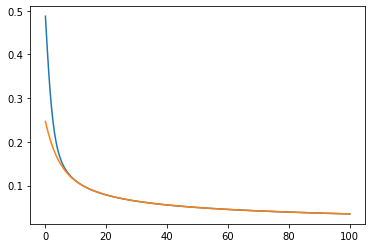

In [8]:
print(overlap.shape)

plt.plot(EjEc, overlap[0, :])
plt.plot(EjEc, overlap[50, :])
# plt.plot(EjEc, overlap)
# print(overlap[200]-overlap[1000])
# plt.imshow(overlap, aspect='auto')


In [9]:
cpb_1 = cpb.Hcpb(nlevels=40)
cpb_2 = cpb.Hcpb(nlevels=40)

print(cpb_1.params_from_spectrum(3.82, -0.229))
print(cpb_2.params_from_spectrum(4.30, -0.225))

(10.167955297492568, 0.19978426107382372)
(12.72818754420086, 0.19973854190090687)


In [10]:
cpb_1.Ej = 12
cpb_2.Ej = 14.75



f01_1 = cpb_1.fij(0,1)
f02_1 = cpb_1.fij(0,2)
print('------- Q1 Params-------')
print(f01_1)
print(cpb_1.anharm())
print('------- Q2 Params-------')
f01_2 = cpb_2.fij(0,1)
f02_2 = cpb_2.fij(0,2)
print(f01_2)
print(cpb_2.anharm())

print('------ 2Q Gate Frequencies------')
print('CZ02: ', np.abs(f01_1 + f01_2 - f02_2))
print('iSWAP: ', np.abs(f01_1-f01_2))
print('CZ20: ', np.abs(f01_1 + f01_2 - f02_1))



------- Q1 Params-------
4.1691989394884255
-0.2260308481519573
------- Q2 Params-------
4.64580049764097
-0.22274032949144384
------ 2Q Gate Frequencies------
CZ02:  0.2538612286611013
iSWAP:  0.47660155815254424
CZ20:  0.7026324063045006


In [11]:
cpb_SQUID = cpb.Hcpb(nlevels=25)
cpb_SQUID.Ej = 30
cpb_SQUID.Ec = 0.2
print(cpb_SQUID.fij(0,1))
print(cpb_SQUID.anharm())

6.721939753875361
-0.21501621283086259


In [12]:
EJ = np.linspace(1, 21, 201)
EC = np.linspace(0.05, 1.05, 101)

cpb_sweep = cpb.Hcpb(nlevels=20, ng=0.5)

f01s = []
etas = []

for Ej in EJ:
    f01_temp = []
    etas_temp = []
    for Ec in EC:
        cpb_sweep.Ej = Ej
        cpb_sweep.Ec = Ec

        f01_temp.append(cpb_sweep.fij(0,1))
        etas_temp.append(cpb_sweep.anharm())
    f01s.append(f01_temp)
    etas.append(etas_temp)

In [13]:
f01s = np.array(f01s)
etas = np.array(etas)

print(f01s.shape)
print(etas.shape)

(201, 101)
(201, 101)


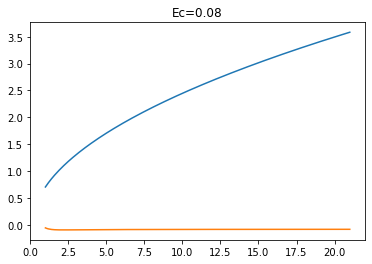

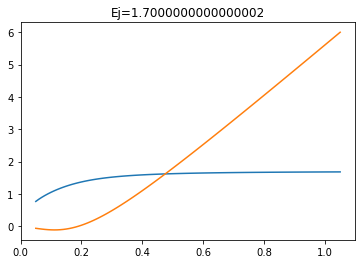

In [14]:
seed = np.random.randint(0, 201)

plt.plot(EJ, f01s[:, seed//2])
plt.plot(EJ, etas[:, seed//2])
_ = plt.title(r'Ec={}'.format(EC[seed//2]))
plt.show()

plt.plot(EC, f01s[seed, :])
plt.plot(EC, etas[seed, :])
_ = plt.title(r'Ej={}'.format(EJ[seed]))
plt.show()

In [15]:
grad = np.gradient(f01s, np.diff(EJ)[0], np.diff(EC)[0], edge_order=2)
grad_eta = np.gradient(f01s + etas, np.diff(EJ)[0], np.diff(EC)[0], edge_order=2)

In [16]:
grad_Ej = grad[0]
grad_Ec = grad[1]

grad_eta_Ej = grad_eta[0]
grad_eta_Ec = grad_eta[1]

(201, 101)


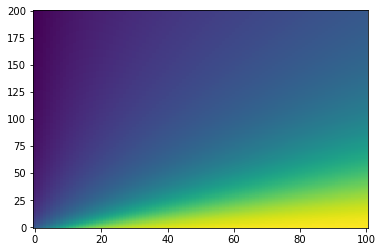

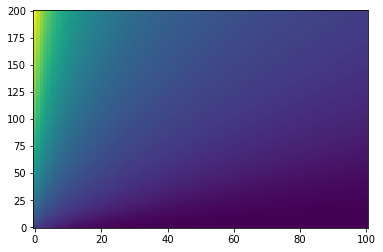

In [17]:
print(grad_Ej.shape)
plt.imshow(grad_Ej, aspect='auto', origin='lower')
plt.show()

plt.imshow(grad_Ec, aspect='auto', origin='lower')

In [18]:
idx1 = 200
idx2 = 1
print(EJ[idx1], EC[idx2])
print(f01s[idx1, idx2], etas[idx1, idx2])
print(grad_Ej[idx1, idx2], grad_Ec[idx1, idx2])




21.0 0.060000000000000005
3.113707231085751 -0.06279453207821462
0.07562244650936378 25.520146244670624


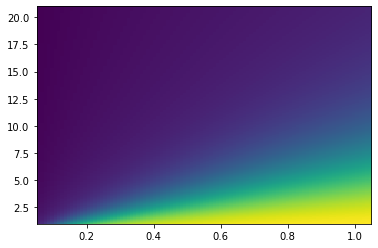

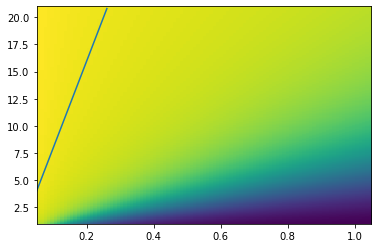

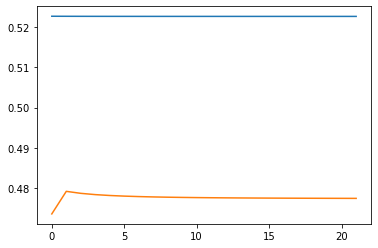

In [19]:
EJ_temp = np.reshape(EJ, (-1, 1))
EC_temp = np.reshape(EC, (1, -1))
EJ_stacked = np.repeat(EJ_temp, 101, axis=1)
EC_stacked = np.repeat(EC_temp, 201, axis=0)

EJ_ratio = grad_Ej*EJ_stacked/f01s
EC_ratio = grad_Ec*EC_stacked/f01s

EJ_ratio_eta = grad_eta_Ej*EJ_stacked/(f01s + etas)
EC_ratio_eta = grad_eta_Ec*EC_stacked/(f01s + etas)


plt.imshow(EJ_ratio, origin='lower', aspect='auto', extent=(0.05,1.05,1,21))
plt.show()

plt.imshow(EC_ratio, origin='lower', aspect='auto', extent=(0.05,1.05,1,21))
# plt.imshow(EC_ratio, origin='lower', aspect='auto')

EJ_EC = EJ_stacked/EC_stacked
where = np.argwhere(np.abs(EJ_EC-80)<0.01)
EC_test = []
EJ_test = []
EJ_ratio_level = []
EC_ratio_level = []
for i in range(where.shape[0]):
    idx1, idx2 = where[i, :]
    EC_test.append(EC_stacked[idx1, idx2])
    EJ_test.append(EJ_stacked[idx1, idx2])
    EJ_ratio_level.append(EJ_ratio[idx1,idx2])
    EC_ratio_level.append(EC_ratio[idx1,idx2])
plt.plot(EC_test, EJ_test)
plt.show()

plt.plot(EJ_ratio_level)
plt.plot(EC_ratio_level)
plt.show()



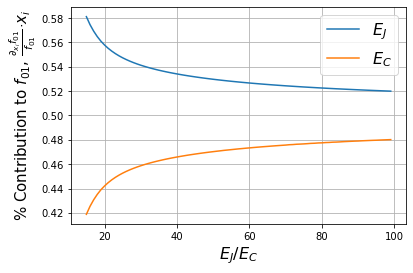

In [20]:
EJEC = np.arange(15, 100)
percent_EJ = []
percent_EC = []
for val in EJEC:
    where = np.argwhere(np.abs(EJ_EC-val)<0.01)
    EJ_ratio_level = []
    EC_ratio_level = []
    for i in range(where.shape[0]):
        idx1, idx2 = where[i, :]
        EC_test.append(EC_stacked[idx1, idx2])
        EJ_test.append(EJ_stacked[idx1, idx2])
        EJ_ratio_level.append(EJ_ratio[idx1,idx2])
        EC_ratio_level.append(EC_ratio[idx1,idx2])
    percent_EJ.append(EJ_ratio_level[-1])
    percent_EC.append(EC_ratio_level[-1])

plt.plot(EJEC, percent_EJ, label=r'$E_J$')
plt.plot(EJEC, percent_EC, label=r'$E_C$')
plt.ylabel(r'% Contribution to $f_{01}$, $\frac{\partial_{x_i} f_{01}}{f_{01}} \dot x_i$', fontsize=15)
plt.xlabel(r'$E_J / E_C$', fontsize=16)
plt.legend(fontsize=16)
plt.grid()
    

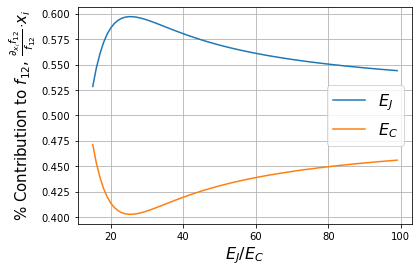

In [21]:
EJEC = np.arange(15, 100)
percent_EJ = []
percent_EC = []
for val in EJEC:
    where = np.argwhere(np.abs(EJ_EC-val)<0.01)
    EJ_ratio_level = []
    EC_ratio_level = []
    for i in range(where.shape[0]):
        idx1, idx2 = where[i, :]
        EC_test.append(EC_stacked[idx1, idx2])
        EJ_test.append(EJ_stacked[idx1, idx2])
        EJ_ratio_level.append(EJ_ratio_eta[idx1,idx2])
        EC_ratio_level.append(EC_ratio_eta[idx1,idx2])
    percent_EJ.append(EJ_ratio_level[-1])
    percent_EC.append(EC_ratio_level[-1])
percent_EJ = np.array(percent_EJ)
percent_EC = np.array(percent_EC)
plt.plot(EJEC, percent_EJ, label=r'$E_J$')
plt.plot(EJEC, percent_EC, label=r'$E_C$')
# plt.plot(EJEC, percent_EJ + percent_EC)
plt.ylabel(r'% Contribution to $f_{12}$, $\frac{\partial_{x_i} f_{12}}{f_{12}} \dot x_i$', fontsize=15)
plt.xlabel(r'$E_J / E_C$', fontsize=16)
plt.legend(fontsize=16)
plt.grid()